In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

In [151]:
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [152]:
df = pd.read_csv("train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [153]:
df.shape

(891, 12)

In [154]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [155]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)

In [156]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [157]:
X = df.drop('Survived', axis='columns')
y = df.Survived

## Using one-hot encoding to convert categorical variable

In [158]:
dummies = pd.get_dummies(X.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


### Adding the dummies into the data

In [159]:
X = pd.concat([X, dummies], axis='columns')
X.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [160]:
X.drop('Sex', axis="columns", inplace=True)
X.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [161]:
X.columns[X.isna().any()]

Index(['Age'], dtype='object')

In [162]:
X.isnull().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

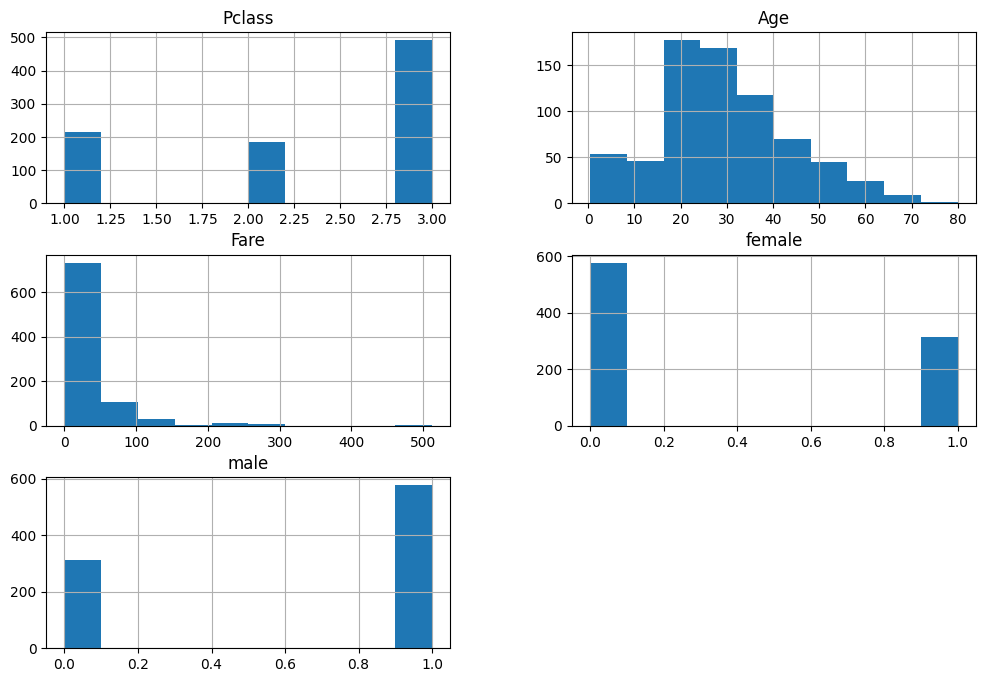

In [163]:
p = X.hist(figsize=(12, 8))

In [164]:
X.Age.mean()

29.69911764705882

In [165]:
X['Age'].fillna(X['Age'].mean(), inplace = True)

In [166]:
X.isnull().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

In [167]:
X.head(10)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1
7,3,2.000000,21.0750,0,1
8,3,27.000000,11.1333,1,0
9,2,14.000000,30.0708,1,0


### splitting the dataset

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [169]:
X_train.shape, X_test.shape

((712, 5), (179, 5))

In [170]:
model = GaussianNB()

In [171]:
model.fit(X_train, y_train)

GaussianNB()

### Chekcing overfitting

In [172]:
model.score(X_test, y_test)

0.7932960893854749

In [173]:
model.score(X_train, y_train)

0.7780898876404494

Both are almost equal, hence no overfitting

# Prediction

In [174]:
y_pred = model.predict(X_test)

In [175]:
accuracy_score(y_test, y_pred)

0.7932960893854749

In [176]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[97, 19],
       [18, 45]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted Label')

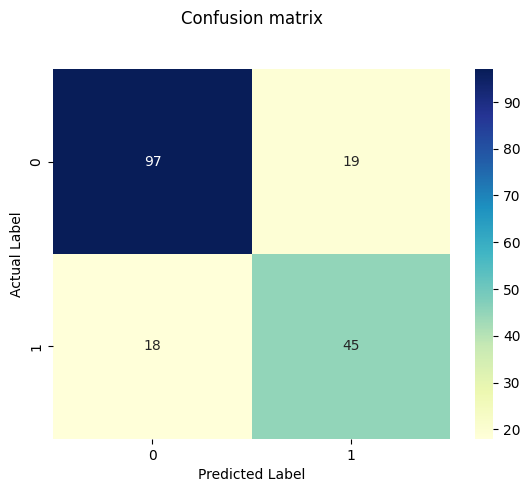

In [177]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       116
           1       0.70      0.71      0.71        63

    accuracy                           0.79       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.79      0.79       179



In [179]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

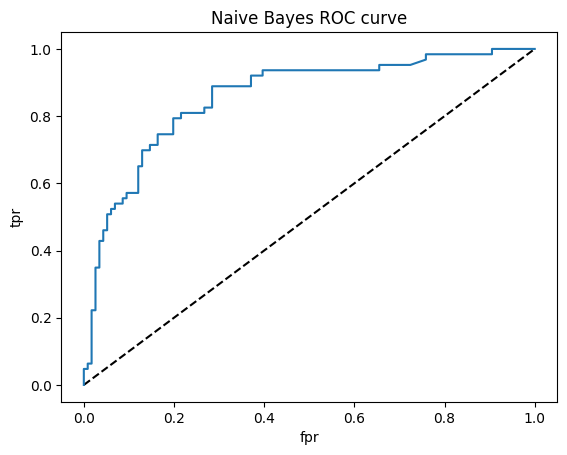

In [180]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayes ROC curve')
plt.show()